# Analisis Efisiensi Algoritma Iteratif dan Rekursif dalam Menghitung Total Asupan Kalori Harian



Azizatul Ainy (103132400030)

Keyla Azzahra (103132300017)

Ruhfaidah Shirotul Akhiroh (103132400019)

## Deskripsi Permasalahan

Perhitungan total asupan kalori harian merupakan proses yang umum dilakukan dalam sistem informasi kesehatan dan aplikasi pemantauan gizi. Proses ini melibatkan penjumlahan nilai kalori dari setiap makanan yang dikonsumsi dalam satu hari. Dalam implementasi algoritmik, perhitungan tersebut dapat dilakukan menggunakan dua pendekatan utama, yaitu algoritma iteratif dan algoritma rekursif. Analisis efisiensi kedua pendekatan ini penting untuk menentukan metode yang paling optimal dari sisi waktu eksekusi dan penggunaan memori.

## Import

In [6]:
import time
import random
import matplotlib.pyplot as plt
import sys
import pandas as pd

## *Iteratif*

In [7]:
# Fungsi Iteratif
# -------------------------
def total_kalori_iteratif(kalori_list):
    """Menghitung total kalori menggunakan iterasi."""
    total = 0
    for kalori in kalori_list:
        total += kalori
    return total

## *Rekursif*

In [8]:
# Fungsi Rekursif
# -------------------------
def total_kalori_rekursif(kalori_list, index=0):
    """Menghitung total kalori menggunakan rekursi."""
    if index >= len(kalori_list):
        return 0
    return kalori_list[index] + total_kalori_rekursif(kalori_list, index + 1)

## Function Pengujian Waktu Eksekusi

In [9]:
# Fungsi Pengujian Waktu Eksekusi
# -------------------------
def ukur_waktu(func, data):
    start = time.perf_counter()
    result = func(data)
    end = time.perf_counter()
    return end - start, result

## Input asupan kalori dan n

In [25]:
if __name__ == "__main__":
    # Input asupan kalori
    asupan_kalori_str = input("Masukkan asupan kalori Anda (pisahkan dengan koma): ")
    asupan_kalori =  [int(x.strip()) for x in asupan_kalori_str.split(',') if x.strip()]

    print("Data asupan kalori:", asupan_kalori)
    print("Hasil iteratif :", total_kalori_iteratif(asupan_kalori))
    print("Hasil rekursif :", total_kalori_rekursif(asupan_kalori))
    print("-" * 50)

    # Ukuran input untuk pengujian (hindari n > 900 untuk rekursif di Python)
    ukuran_input_str = input("Masukkan ukuran input untuk pengujian performa (pisahkan dengan koma): ")
    ukuran_input = [int(x.strip()) for x in ukuran_input_str.split(',') if x.strip()]

    print("Ukuran input untuk pengujian performa:", ukuran_input)

    # Pengujian waktu eksekusi
    waktu_iteratif = []
    waktu_rekursif = []

    for n in ukuran_input:
        data = [random.randint(50, 800) for _ in range(n)]

        # Ukur waktu iteratif
        t_iter, _ = ukur_waktu(total_kalori_iteratif, data)
        waktu_iteratif.append(t_iter)

        # Ukur waktu rekursif (dengan penanganan error)
        try:
            t_rek, _ = ukur_waktu(total_kalori_rekursif, data)
            waktu_rekursif.append(t_rek)
        except RecursionError:
            print(f"RecursionError pada n = {n}. Hentikan pengujian rekursif.")
            # Isi sisa nilai dengan None atau hentikan loop
            waktu_rekursif.extend([None] * (len(ukuran_input) - len(waktu_rekursif)))
            break

    # Filter data untuk plotting (hapus None)
    valid_ukuran = []
    valid_rekursif = []
    for i, t in enumerate(waktu_rekursif):
        if t is not None:
            valid_ukuran.append(ukuran_input[i])
            valid_rekursif.append(t)
        else:
            break

Masukkan asupan kalori Anda (pisahkan dengan koma): 20, 40, 60, 80, 100, 200, 250
Data asupan kalori: [20, 40, 60, 80, 100, 200, 250]
Hasil iteratif : 750
Hasil rekursif : 750
--------------------------------------------------
Masukkan ukuran input untuk pengujian performa (pisahkan dengan koma): 0, 5, 10, 15
Ukuran input untuk pengujian performa: [0, 5, 10, 15]


## Performance Comparison

In [26]:
# Create a DataFrame
df_perbandingan = pd.DataFrame({
    'Ukuran Input (n)': ukuran_input,
    'Waktu Iteratif (detik)': waktu_iteratif,
    'Waktu Rekursif (detik)': waktu_rekursif
})

# Replace None values with 'N/A' for recursive time where tests were halted
df_perbandingan['Waktu Rekursif (detik)'] = df_perbandingan['Waktu Rekursif (detik)'].fillna('N/A')

print("Tabel Perbandingan Waktu Eksekusi Iteratif vs Rekursif:")
print(df_perbandingan)

Tabel Perbandingan Waktu Eksekusi Iteratif vs Rekursif:
   Ukuran Input (n)  Waktu Iteratif (detik)  Waktu Rekursif (detik)
0                 0                0.000001                0.000001
1                 5                0.000002                0.000003
2                10                0.000002                0.000003
3                15                0.000002                0.000005


## Grafik Perbandingan

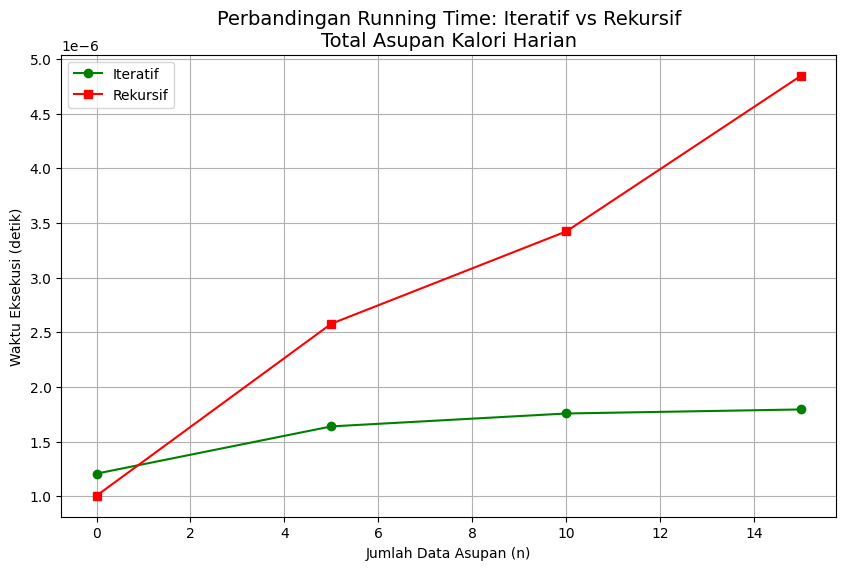

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(ukuran_input, waktu_iteratif, marker='o', label="Iteratif", color='green')
plt.plot(valid_ukuran, valid_rekursif, marker='s', label="Rekursif", color='red')

plt.title("Perbandingan Running Time: Iteratif vs Rekursif\nTotal Asupan Kalori Harian", fontsize=14)
plt.xlabel("Jumlah Data Asupan (n)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.legend()
plt.grid()
plt.show()